In [74]:
import pandas as pd
import numpy as np
import re

In [75]:
df2 = pd.read_csv('new_data_8529.csv', sep='\t', encoding='UTF-8')
df = df2.loc[df2['대상 선정']=='O',:]

In [76]:
df.columns

Index(['std_clm_type_cd', 'ro_y', 'clm_jgmt_dt', 'ceq_caus_cd', 'ceq_psit_cd',
       'ceq_psit_nm', 'trim_plnt_cd', 'prj_vehl_cd', 'mdl_cd', 'part_sys_cd',
       'repn_part_cd', 'clm_prtl_sbc', '대상 선정', '구분', '책임구', '원인', '검토결과'],
      dtype='object')

In [77]:
df.head(2)

std_clm_type_cd  ro_y  clm_jgmt_dt ceq_caus_cd ceq_psit_cd    ceq_psit_nm  \
12               W  2017     20171010         ZZ7         B11  조립 문제_미장착/오장착   
14               W  2018     20180725         ZZ7         B11  조립 문제_미장착/오장착   

   trim_plnt_cd prj_vehl_cd mdl_cd part_sys_cd repn_part_cd  \
12         KV11          CK     J5          AC        91500   
14         KV11          YP     A9          EE        28291   

                                         clm_prtl_sbc 대상 선정       구분   책임구  \
12  [C] 현상-1. 현상  가. 인도후 오디오 작동시 주파수 및 노이즈 발생으로 고객...     O  기능(커넥터)  생산공장   
14  [C] 1. 현상  주행중 엔진경고등 점등2. 점검내용 및 원인  스캔점검결과 P2...     O  기능(커넥터)  생산공장   

     원인                검토결과  
12  미결선  O-기능(커넥터)-생산공장-미결선  
14   기타   O-기능(커넥터)-생산공장-기타

In [78]:
df.shape

(3012, 17)

In [79]:
x = df['clm_prtl_sbc']
y = df['구분']

In [80]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 157
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x)                   # X의 각 행에 토큰화를 수행
sequences = tokenizer.texts_to_sequences(x) # 단어를 숫자인덱스로 변환하여 저장

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았어요.' % len(word_index))

17372개의 고유한 토큰을 찾았어요.


In [59]:
maxlen = 157
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer2 = Tokenizer(num_words=max_words)
tokenizer2.fit_on_texts(y)                   # X의 각 행에 토큰화를 수행
sequences2 = tokenizer2.texts_to_sequences(y) # 단어를 숫자인덱스로 변환하여 저장

word_index2 = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았어요.' % len(word_index2))

17372개의 고유한 토큰을 찾았어요.


In [60]:
data = pad_sequences(sequences, maxlen=maxlen)
labels = pad_sequences(sequences2, maxlen=maxlen)

In [61]:
# labels = np.asarray(y)
print('데이터 텐서의 크기:', data.shape)
print('레이블 텐서의 크기:', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

데이터 텐서의 크기: (3012, 157)
레이블 텐서의 크기: (3012, 157)


In [62]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validataion_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [ ]:
# from keras.layers import SimpleRNN, Embedding, Dense, LSTM
# from keras.models import Sequential
# from keras.preprocessing.sequence import pad_sequences

# vocab_size = len(word_index)+1   # 단어의 수
# max_len = 157                    # 전체 데이터의 길이는 157로 맞춥니다.
# data = pad_sequences(x, maxlen=max_len)
# print("data shape: ", data.shape)

In [ ]:
# x_test = data[n_of_train:]  # x데이터 중에서 뒤의 2409개의 데이터만 저장
# y_test = y[n_of_train:]     # y데이터 중에서 뒤의 603개의 데이터만 저장
# x_train = data[:n_of_train] # x데이터 중에서 앞의 2409개의 데이터만 저장
# y_train = y[:n_of_train]    # y데이터 중에서 앞의 603개의 데이터만 저장

In [63]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(200, 157)
(200, 157)
(2812, 157)
(2812, 157)


In [64]:
print(x_train)
print(y_train)
print(x_val)
print(y_val)

[[   0    0    0 ...   74    6   20]
 [   0    0    0 ...   15 2555   45]
 [   0    0    0 ... 6498 1061 3401]
 ...
 [   0    0    0 ...    4  249  418]
 [   0    0    0 ...    4  203  150]
 [   0    0    0 ...  691   10   45]]
[[0 0 0 ... 0 1 2]
 [0 0 0 ... 0 1 2]
 [0 0 0 ... 0 1 2]
 ...
 [0 0 0 ... 0 0 3]
 [0 0 0 ... 0 0 3]
 [0 0 0 ... 0 0 3]]
[[   0    0    0 ...   43   28    6]
 [   0    0    0 ...    9 4869    6]
 [   0    0    0 ...  216  107  113]
 ...
 [   0    0    0 ... 2622 1409 1295]
 [   0    0    0 ... 1038   40   45]
 [   0    0    0 ...   29    6   12]]
[[0 0 0 ... 0 1 2]
 [0 0 0 ... 0 0 3]
 [0 0 0 ... 0 1 2]
 ...
 [0 0 0 ... 0 1 2]
 [0 0 0 ... 0 1 2]
 [0 0 0 ... 0 1 2]]


In [67]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
embedding_dim = 100
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(157, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 157, 100)          1000000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 15700)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                502432    
_________________________________________________________________
dense_8 (Dense)              (None, 157)               5181      
Total params: 1,507,613
Trainable params: 1,507,613
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_val, y_val))
model.save_weights('pre_trained_model.h5')

Train on 200 samples, validate on 2812 samples
Epoch 1/10
200/200 [==============================] - 2s 11ms/step - loss: 0.5312 - acc: 0.6924 - val_loss: 0.2757 - val_acc: 0.8590
Epoch 2/10
200/200 [==============================] - 1s 5ms/step - loss: 0.1665 - acc: 0.9004 - val_loss: 0.0076 - val_acc: 0.9643
Epoch 3/10
200/200 [==============================] - 1s 5ms/step - loss: -0.0519 - acc: 0.9698 - val_loss: -0.1168 - val_acc: 0.9839
Epoch 4/10
200/200 [==============================] - 2s 11ms/step - loss: -0.1234 - acc: 0.9848 - val_loss: -0.1448 - val_acc: 0.9906
Epoch 5/10
200/200 [==============================] - 2s 10ms/step - loss: -0.1416 - acc: 0.9909 - val_loss: -0.1519 - val_acc: 0.9904
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: -0.1456 - acc: 0.9904 - val_loss: -0.1500 - val_acc: 0.9906
Epoch 7/10
200/200 [==============================] - 1s 4ms/step - loss: -0.1472 - acc: 0.9906 - val_loss: -0.1549 - val_acc: 0.9903
Epoch 8/10
200/2

In [69]:
import matplotlib.pyplot as plt

In [70]:
print(history.history['acc'])
print(history.history['val_acc'])
print(history.history['loss'])
print(history.history['val_loss'])

[0.692420380115509, 0.9004140138626099, 0.9698407793045044, 0.9848089456558228, 0.9909235572814942, 0.9903503274917602, 0.9906051015853882, 0.9912102007865906, 0.9908917117118835, 0.9911464786529541]
[0.8589756810987318, 0.9643271637505522, 0.9839133832227455, 0.9906066892665956, 0.9903892451634957, 0.9906157484943124, 0.990275995320989, 0.990275995320989, 0.9906157484943124, 0.9906157484943124]
[0.5312022817134857, 0.16649468883872032, -0.05191813826560974, -0.12341734766960144, -0.14161181807518006, -0.14563592970371247, -0.14716016232967377, -0.1487977111339569, -0.14844846874475479, -0.1490392243862152]
[0.2756540491689489, 0.007596666998843296, -0.11675291546589958, -0.1447908835721389, -0.15190578999254817, -0.15001767142483724, -0.15486140229115275, -0.1539454859910615, -0.15411463530355293, -0.1563626396791694]


<Figure size 432x288 with 0 Axes>

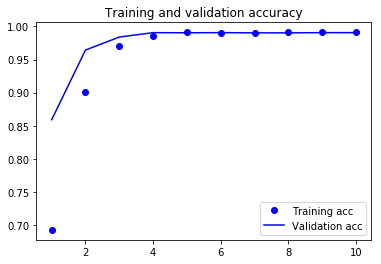

<Figure size 432x288 with 0 Axes>

In [71]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

<Figure size 432x288 with 0 Axes>

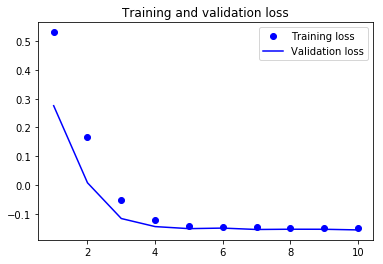

<Figure size 432x288 with 0 Axes>

In [73]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.figure()